In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

### Q1. A

In [3]:
df = pd.read_csv('Signal.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. B

In [6]:
df.isna().sum()/len(df)*100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

### Q1. C

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.duplicated().sum()

0

### Q1. D

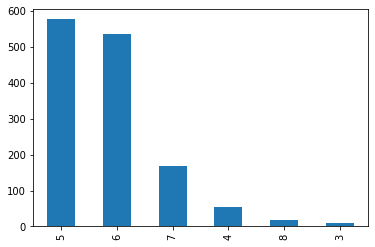

In [10]:
df.Signal_Strength.value_counts().plot(kind='bar')

### Q1. E

- Signal strength is biased towards 5 & 6.
- Range of sensors is different for different attributes, hence normalization would be required.

### Q2. A

In [11]:
X=df.drop('Signal_Strength',axis=1)   # Independent variables
Y=df['Signal_Strength']               # Target variable

### Q2. B

In [27]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

### Q2. C


In [28]:
print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)


(951, 11)
(951,)
(408, 11)
(408,)


### Q2. D


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_Train)
X_Train_S = scaler.transform(X_Train)
X_Test_S = scaler.transform(X_Test)

### Q2. E


In [25]:
Y_Train = tf.keras.utils.to_categorical(Y_Train)
Y_Test = tf.keras.utils.to_categorical(Y_Test) 

### Q3. A

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout

In [ ]:
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))
NN_model_Regressor.add(BatchNormalization())

# NN_model_Regressor.add(Dense(6, kernel_initializer='normal', activation='relu'))
# NN_model_Regressor.add(Dense(6, kernel_initializer='normal', activation='relu'))
NN_model_Regressor.add(Dense(9,activation='relu'))
# The Output Layer :
NN_model_Regressor.add(Dense(9,activation='softmax'))  # except softmax
# NN_model_Regressor.add(tf.keras.layers.ReLU())

# Compile the network :
NN_model_Regressor.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
Total params: 374
Trainable params: 352
Non-trainable params: 22
_________________________________________________________________


2021-12-03 11:41:47.691564: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Q3. B

In [ ]:
# NN_model_Regressor.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
model_train = NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=100, batch_size=128)

2021-12-03 11:41:47.792645: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.1948 - mean_squared_error: 0.1014 - val_loss: 0.1965 - val_mean_squared_error: 0.0978
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1911 - mean_squared_error: 0.0976 - val_loss: 0.1959 - val_mean_squared_error: 0.0972
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1876 - mean_squared_error: 0.0946 - val_loss: 0.1951 - val_mean_squared_error: 0.0965
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1839 - mean_squared_error: 0.0920 - val_loss: 0.1942 - val_mean_squared_error: 0.0956
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1799 - mean_squared_error: 0.0894 - val_loss: 0.1931 - val_mean_squared_error: 0.0947
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1761 - mean_squared_error: 0.0868 - val_loss: 0.1919 - val_mean_squared_error: 0.0936
Epoch 7/100
8/8 [============================

8/8 [==============================] - 0s 4ms/step - loss: 0.0860 - mean_squared_error: 0.0710 - val_loss: 0.0915 - val_mean_squared_error: 0.0716
Epoch 53/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - mean_squared_error: 0.0717 - val_loss: 0.0914 - val_mean_squared_error: 0.0721
Epoch 54/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0858 - mean_squared_error: 0.0712 - val_loss: 0.0914 - val_mean_squared_error: 0.0731
Epoch 55/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0862 - mean_squared_error: 0.0719 - val_loss: 0.0913 - val_mean_squared_error: 0.0736
Epoch 56/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0860 - mean_squared_error: 0.0717 - val_loss: 0.0912 - val_mean_squared_error: 0.0738
Epoch 57/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0858 - mean_squared_error: 0.0717 - val_loss: 0.0910 - val_mean_squared_error: 0.0737
Epoch 58/100
8/8 [==============================] - 0

### Q3. C

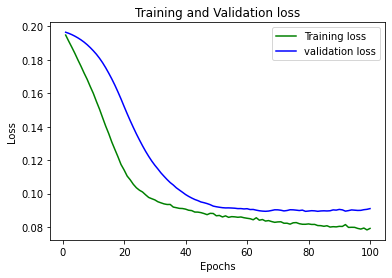

In [ ]:
loss_train = NN_model_Regressor.history.history['loss']
loss_val = NN_model_Regressor.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

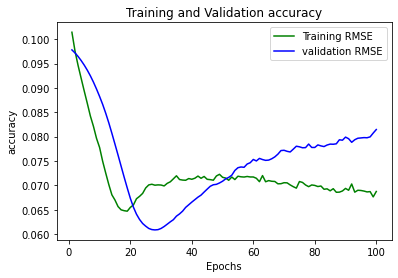

In [ ]:
Acc_train = NN_model_Regressor.history.history['mean_squared_error']
Acc_val = NN_model_Regressor.history.history['val_mean_squared_error']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training RMSE')
plt.plot(epochs, Acc_val, 'b', label='validation RMSE')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Q3. D

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(11, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))
NN_model.add(BatchNormalization())

NN_model.add(Dense(9,activation='relu'))

NN_model.add(Dense(9,activation='relu'))
# The Output Layer :
NN_model.add(Dense(9,activation='softmax'))  # except softmax
# NN_model_Regressor.add(tf.keras.layers.ReLU())

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_1 (Batch (None, 11)                44        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 90        
Total params: 464
Trainable params: 442
Non-trainable params: 22
_________________________________________________________________


In [ ]:
NN_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model_train = NN_model.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 1s 6ms/step - loss: 2.0484 - accuracy: 0.2292 - val_loss: 2.0918 - val_accuracy: 0.3897
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.8323 - accuracy: 0.3722 - val_loss: 1.9829 - val_accuracy: 0.3897
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.6482 - accuracy: 0.3922 - val_loss: 1.8567 - val_accuracy: 0.3897
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 1.5056 - accuracy: 0.3954 - val_loss: 1.7285 - val_accuracy: 0.3897
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 1.3755 - accuracy: 0.4090 - val_loss: 1.5949 - val_accuracy: 0.5319
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 1.2467 - accuracy: 0.4900 - val_loss: 1.4512 - val_accuracy: 0.5662
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 1.1637 - accuracy: 0.5195 - val_loss: 1.3234 - val_accuracy: 0.5833
Epoch 8/100
3

Epoch 59/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.6204 - val_loss: 1.0331 - val_accuracy: 0.6103
Epoch 60/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.6162 - val_loss: 1.0266 - val_accuracy: 0.6078
Epoch 61/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.6215 - val_loss: 1.0306 - val_accuracy: 0.5956
Epoch 62/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.6246 - val_loss: 1.0290 - val_accuracy: 0.6005
Epoch 63/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.6172 - val_loss: 1.0326 - val_accuracy: 0.5907
Epoch 64/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.6109 - val_loss: 1.0240 - val_accuracy: 0.5980
Epoch 65/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.6046 - val_loss: 1.0345 - val_accuracy: 0.6054
Epoch 

### Q3. E

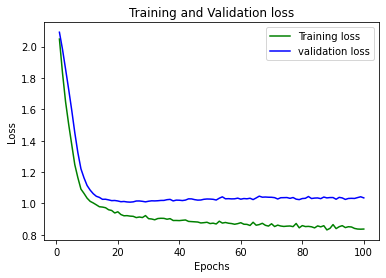

In [ ]:
loss_train = NN_model.history.history['loss']
loss_val = NN_model.history.history['val_loss']
epochs = range(1,100+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

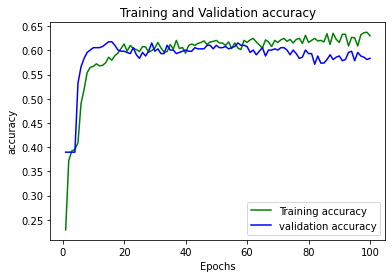

In [ ]:
Acc_train = NN_model.history.history['accuracy']
Acc_val = NN_model.history.history['val_accuracy']
epochs = range(1,100+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

- Loss in both training and testing data is gradual with batch size 128 whereas slope is steeper with batch size 32. 
- Accuracy improved by ~5% when additional hidden layer is introduced.